In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)

from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario, SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments, optimize
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

/usr/local/lib/python3.7/site-packages/ema_workbench/analysis/prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [3]:
from visualization_functions import histogram_maker, mean_outcomes, aggregate_outcomes, scatter_maker, pairplot_maker, boxplot_histogram_maker

# Data visualization on the base case

In [4]:
# Load in the file you want to analyze
# Single Policy experiments:
# 200ScenariosRWSPolicies
# 1000ScenariosBaseCase

# Multiple policy experiments
# 1000ScenariosBaseRfRDikePolicies
# 200Scenarios50Policies
# 400Scenarios75Policies

results = utilities.load_results('outcomes/1000ScenariosBaseCase.csv')

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)
results = experiments.join(outcomes)
results = results.drop(columns="model")
# results = results.apply(pd.to_numeric)
results.head()

[MainProcess/INFO] results loaded succesfully from /Users/jrwang/Documents/Coding/Model-based-decision-making/outcomes/1000ScenariosBaseCase.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,64.0,341.707998,10.0,0.008967,329.059434,1.0,0.671443,46.836038,1.0,0.541864,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0
1,49.0,270.516534,1.0,0.389864,64.116779,1.0,0.458602,211.600292,1.5,0.030226,...,0,1.053592,0.0,0,0.0,0.0,0,0.0,0.0,0.0
2,109.0,217.092157,1.0,0.720433,119.844801,1.5,0.445405,332.843340,10.0,0.123183,...,0,1.091069,0.0,0,0.0,0.0,0,0.0,0.0,0.0
3,106.0,314.195207,1.0,0.000931,149.934556,10.0,0.203409,177.126583,1.5,0.900999,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0
4,123.0,331.097660,1.5,0.138750,275.055604,1.0,0.296295,172.209395,1.5,0.888339,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0


Plot Expected Annual Damage(Histogram)
This is timestep 0


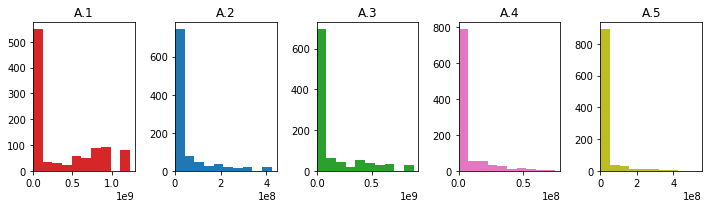

This is timestep 1


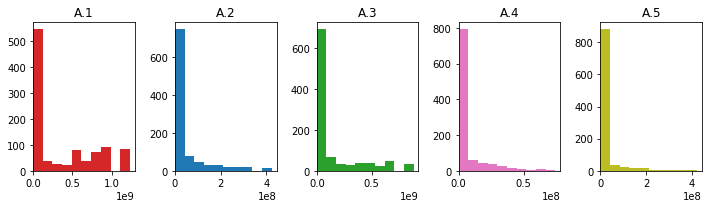

This is timestep 2


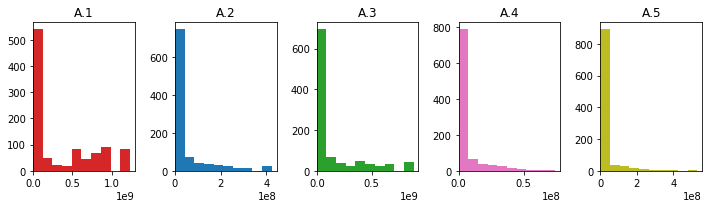

Plot Expected Number of Deaths(Histogram)
This is timestep 0


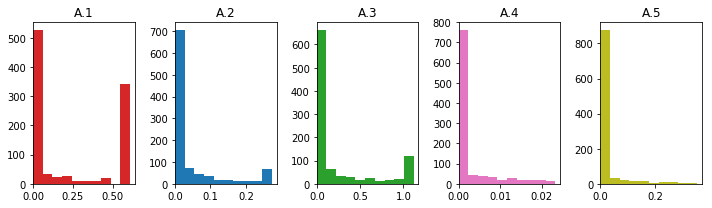

This is timestep 1


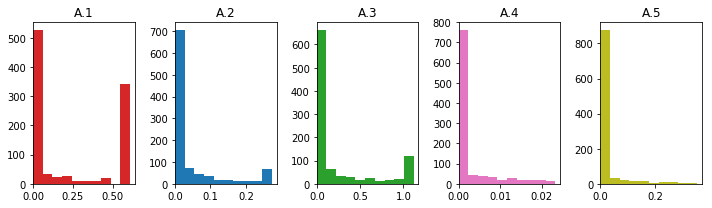

This is timestep 2


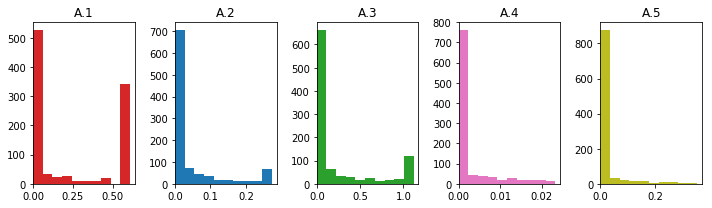

In [5]:
histogram_maker(results, "Expected Annual Damage")
histogram_maker(results, "Expected Number of Deaths")

No handles with labels found to put in legend.


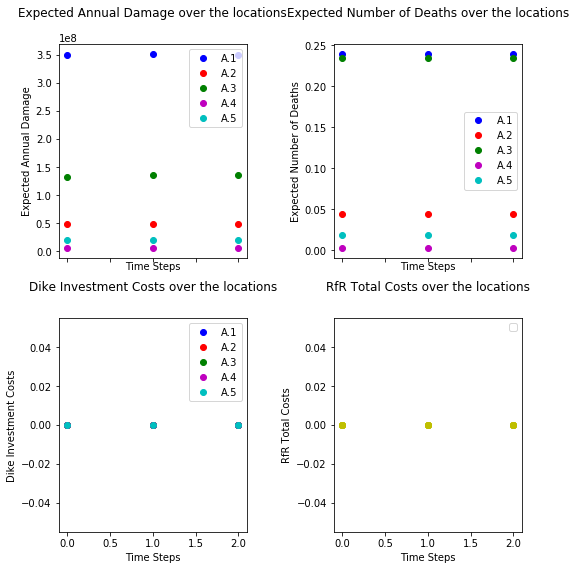

In [6]:
mean_outcomes(results)

Plot Expected Annual Damage(Scatterplot)
This is timestep 0


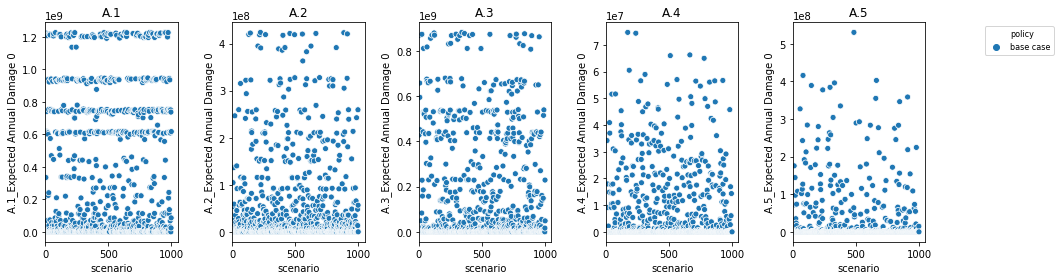

This is timestep 1


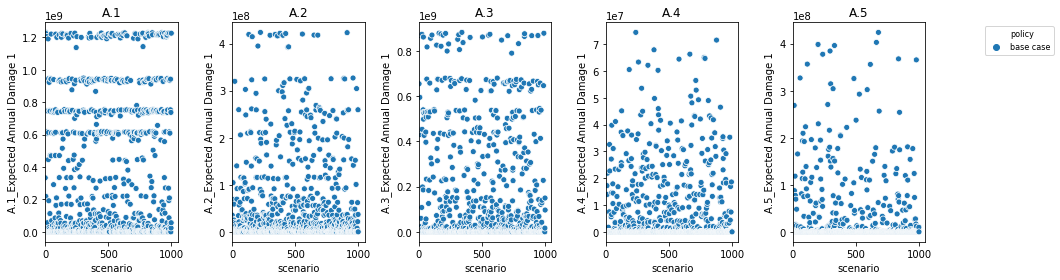

This is timestep 2


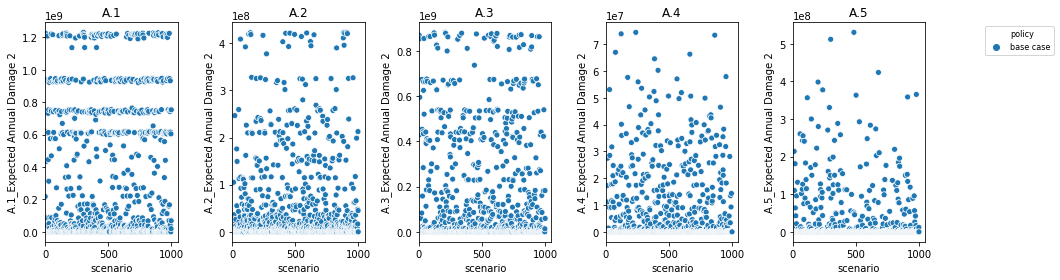

Plot Expected Number of Deaths(Scatterplot)
This is timestep 0


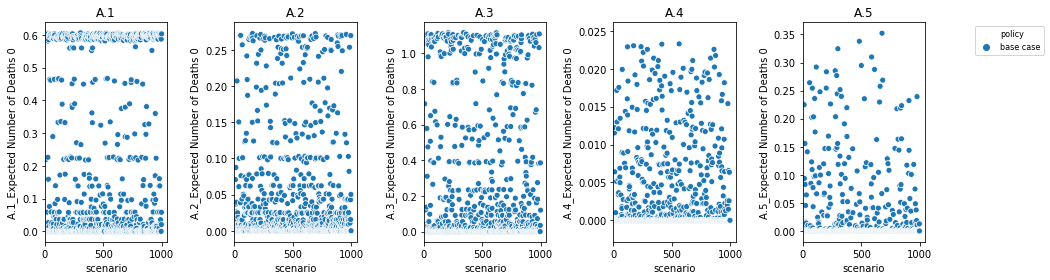

This is timestep 1


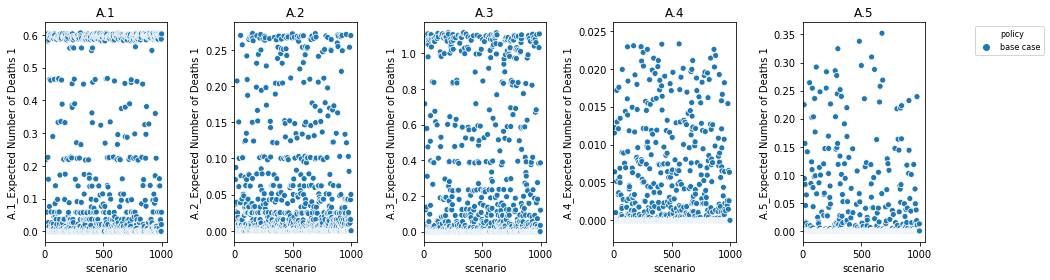

This is timestep 2


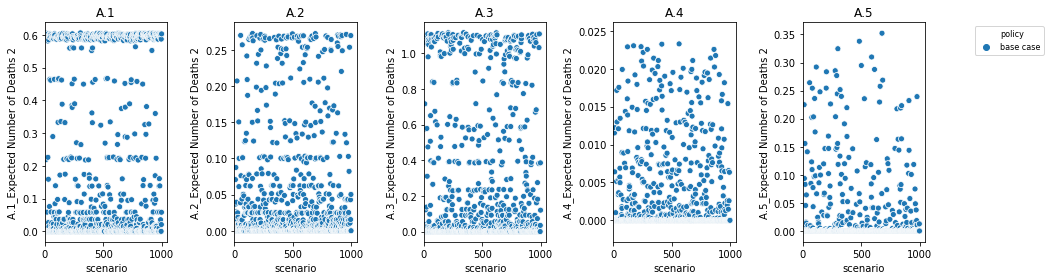

In [7]:
scatter_maker(results, "Expected Annual Damage")
scatter_maker(results, "Expected Number of Deaths")

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


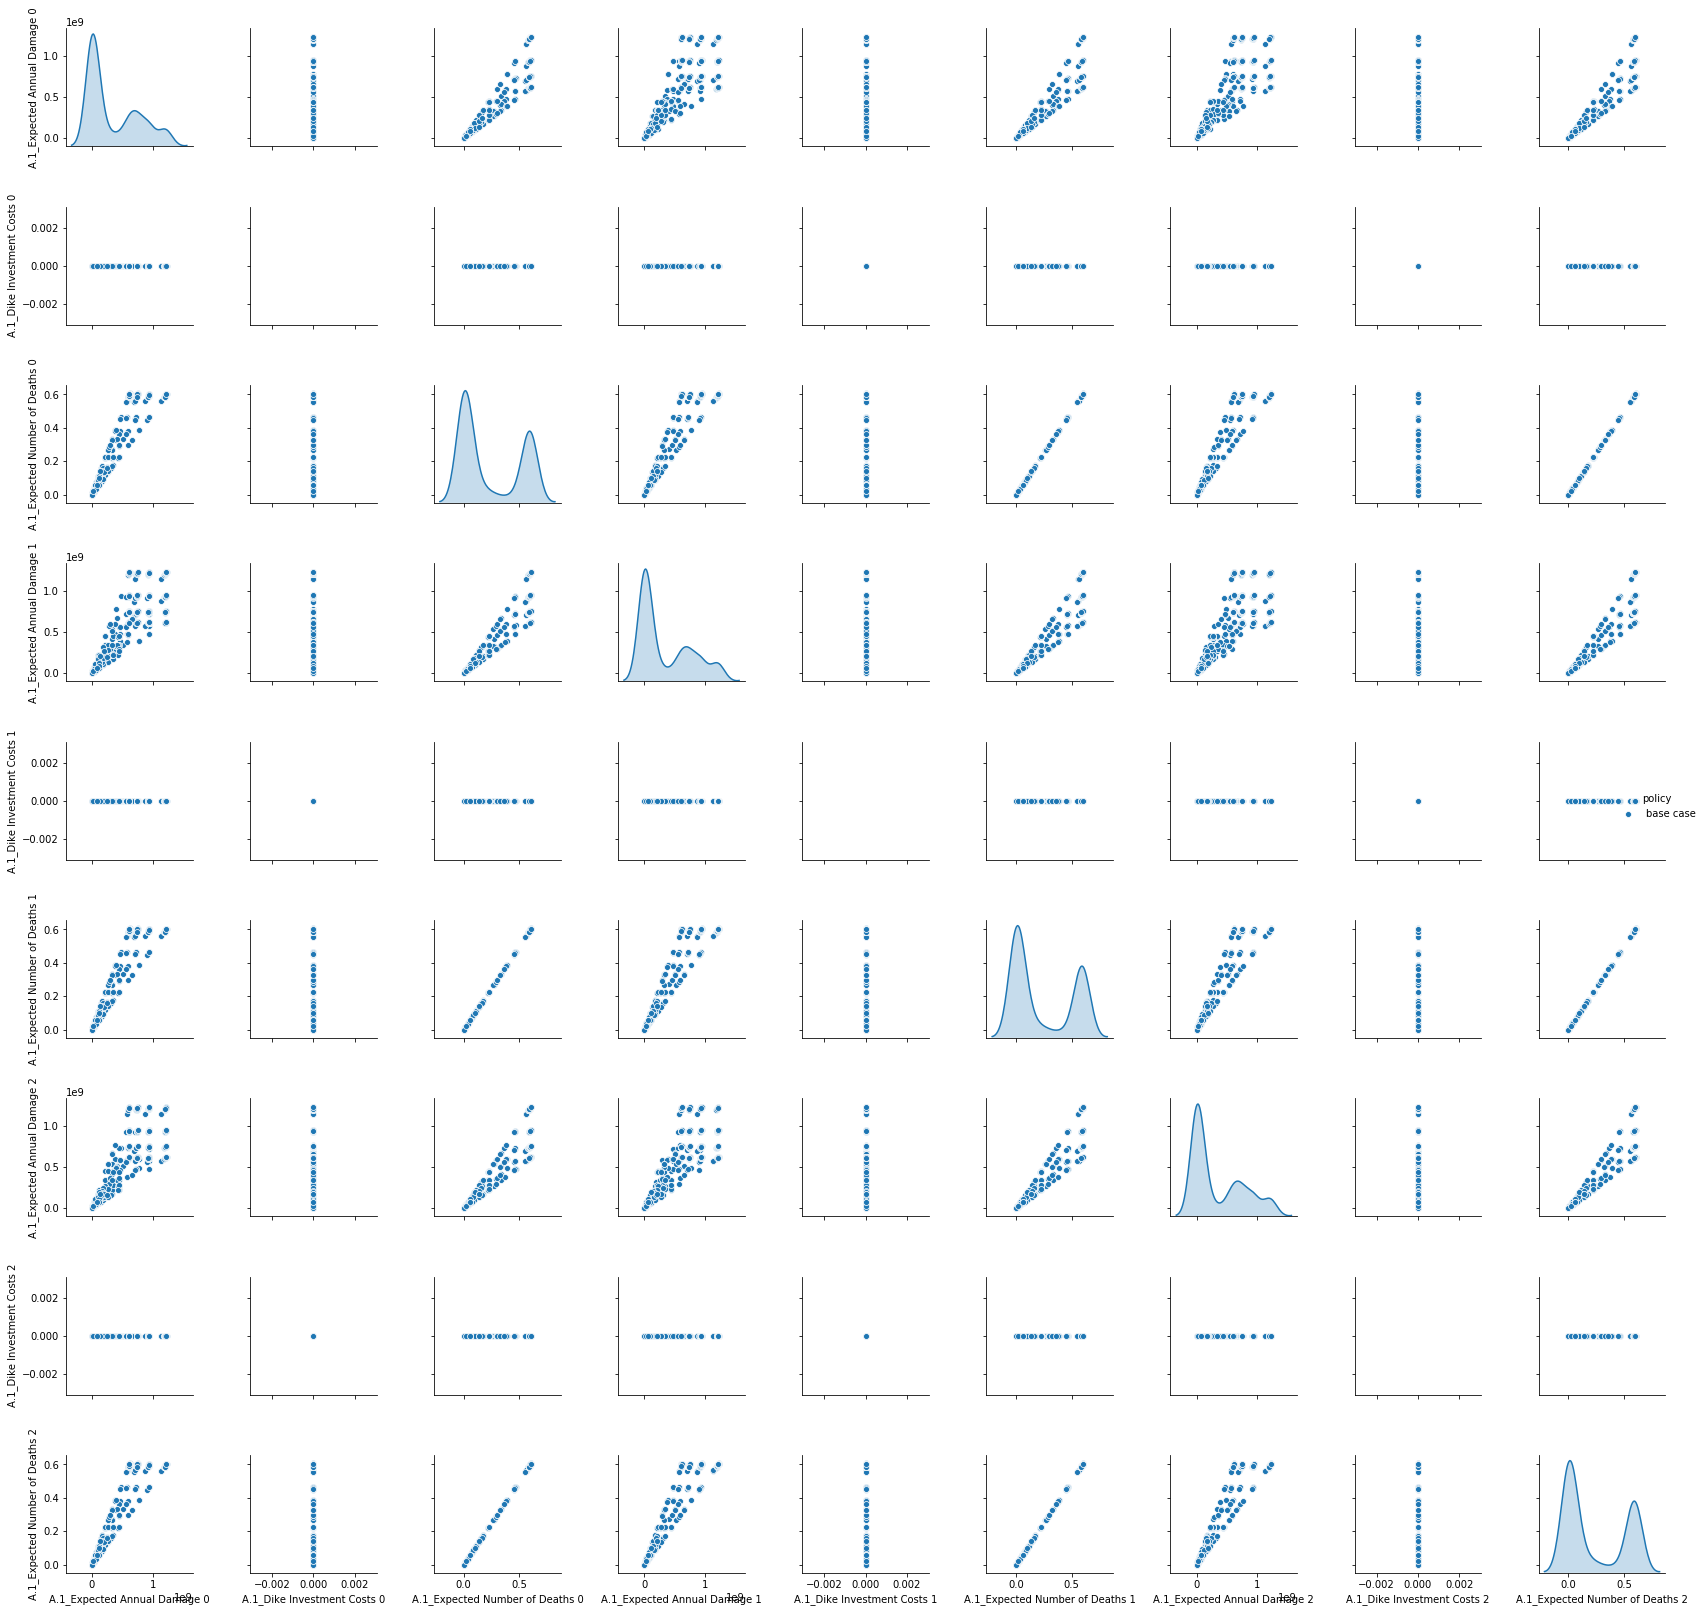

In [8]:
pairplot_maker(results, "A.1")
# pairplot_maker(results, "A.2")
# pairplot_maker(results, "A.3")
# pairplot_maker(results, "A.4")
# pairplot_maker(results, "A.5")

# Scenario Discovery

In [9]:
aggregate_outcomes(results, "Expected Number of Deaths")
aggregate_outcomes(results, "Expected Annual Damage")

Total Expected Number of Deaths First quantile: 0.614663518226044
Total Expected Number of Deaths Mean: 1.615753553317979
Total Expected Annual Damage First quantile: 583888960.7998052
Total Expected Annual Damage Mean: 1678899372.4850554


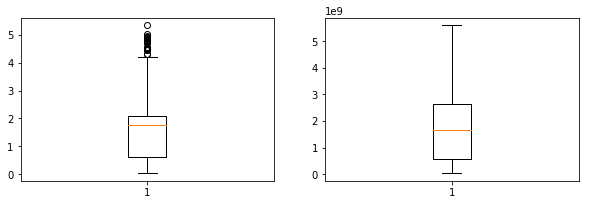

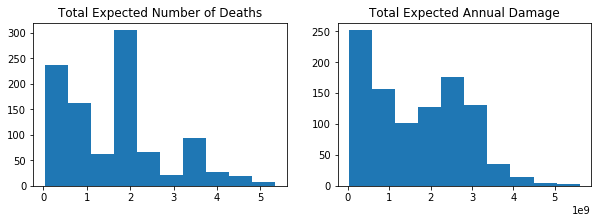

In [10]:
boxplot_histogram_maker(results)

In [11]:
x = results.iloc[:, :19] # Only take the uncertentainties 

y_deaths = results['Total Expected Number of Deaths'].values
y_deaths = y_deaths > np.percentile(y_deaths, 85)

## Scenario Discovery on Deaths

[MainProcess/INFO] 1000 points remaining, containing 150 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.094, coverage: 0.6266666666666667, density: 1.0 restricted_dimensions: 3


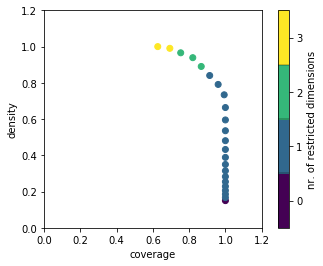

In [12]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.65, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage    0.626667
density            1
id                22
mass           0.094
mean               1
res_dim            3
Name: 22, dtype: object

             box 22                                          
                min       max                       qp values
A.3_pfail  0.000048  0.144188   [-1.0, 4.840687032040365e-69]
A.1_pfail  0.345671  0.999122  [2.1161879348389605e-06, -1.0]
A.2_pfail  0.081178  0.999189     [0.06728957532293703, -1.0]



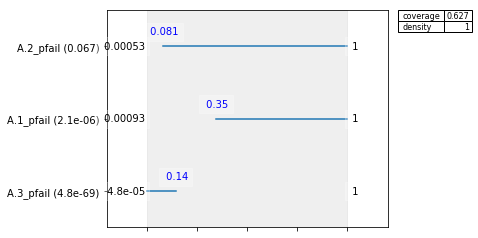

In [13]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

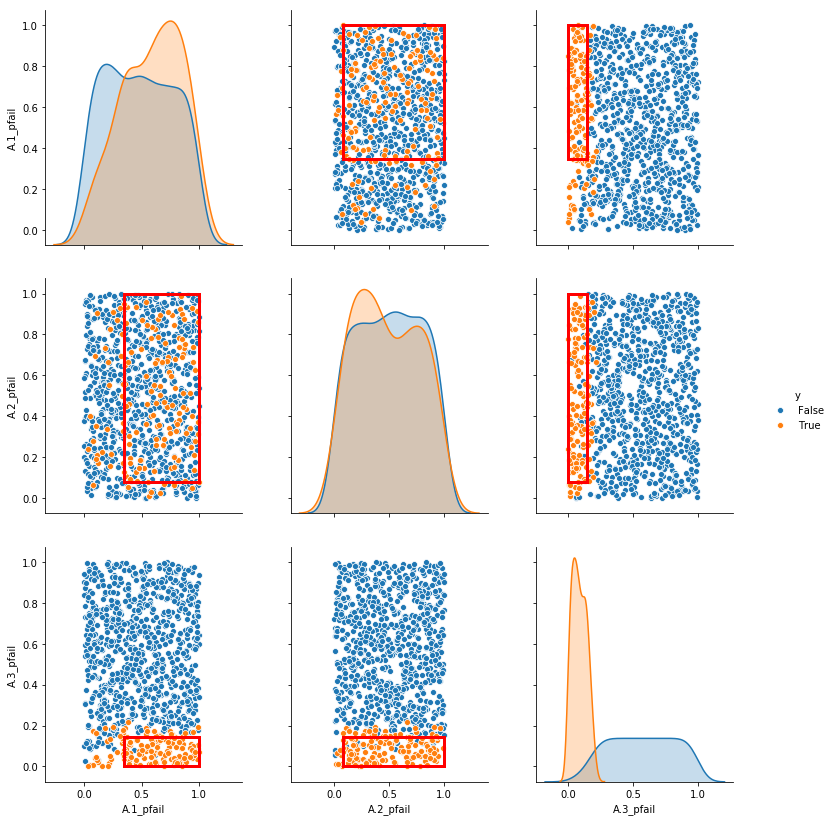

In [14]:
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

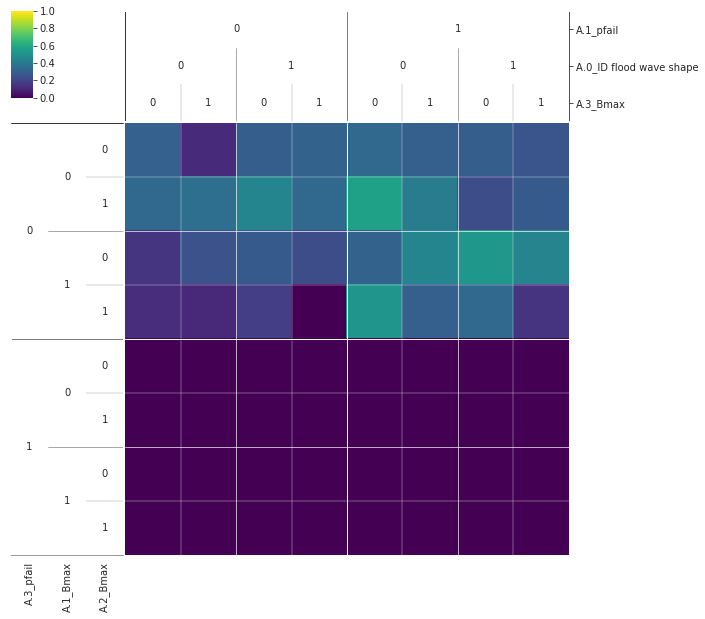

In [15]:
dimensional_stacking.create_pivot_plot(x, y_deaths, 3, nbins = 2)
plt.show()

       coverage   density   mass  res dim
box 1  0.173333  0.520000  0.050        2
box 2  0.406667  0.968254  0.063        2
box 3  0.373333  0.888889  0.063        2
box 4  0.046667  0.140000  0.050        1
box 5  0.000000  0.000000  0.774        1
                 box 1                  box 2                 box 3            \
                   min       max          min        max        min       max   
A.3_pfail  4.78221e-05  0.175958  4.78221e-05  0.0811844  0.0811844  0.175958   
A.1_pfail  0.000930847  0.345671     0.345671   0.999122   0.345671  0.999122   

                 box 4                  box 5            
                   min       max          min       max  
A.3_pfail     0.175958  0.226432     0.226432  0.999879  
A.1_pfail  0.000930847  0.999122  0.000930847  0.999122  


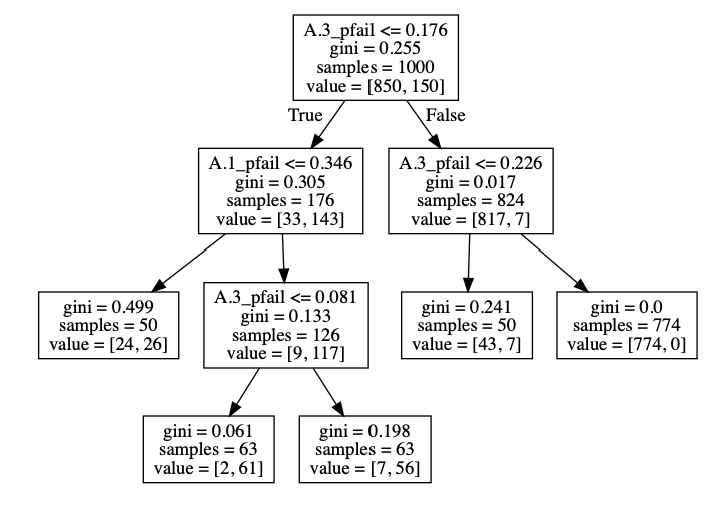

In [16]:
cart_alg = cart.CART(x, y_deaths, 0.05)
cart_alg.build_tree()

print(cart_alg.stats_to_dataframe())
print(cart_alg.boxes_to_dataframe())

fig = cart_alg.show_tree()
fig.set_size_inches(12, 12)
plt.show()

## Scenario Discovery on Damages

In [17]:
y_damages = results['Total Expected Annual Damage'].values
y_damages = y_damages > np.percentile(y_damages, 90)

[MainProcess/INFO] 1000 points remaining, containing 100 cases of interest
[MainProcess/INFO] mean: 0.5555555555555556, mass: 0.099, coverage: 0.55, density: 0.5555555555555556 restricted_dimensions: 5


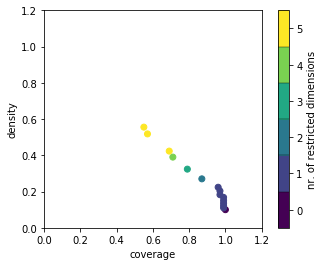

In [18]:
prim_alg = prim.Prim(x, y_damages, threshold=0.55, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage        0.55
density     0.555556
id                14
mass           0.099
mean        0.555556
res_dim            5
Name: 14, dtype: object

                          box 14                   \
                             min              max   
A.1_pfail            0.000930847         0.390932   
A.1_Bmax                 30.0525          306.718   
discount rate 0       {1.5, 2.5}       {1.5, 2.5}   
discount rate 2  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}   
discount rate 1  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}   

                                                 
                                      qp values  
A.1_pfail         [-1.0, 2.964769179127261e-12]  
A.1_Bmax             [-1.0, 0.2948623204315433]  
discount rate 0  [0.00041716064300372933, -1.0]  
discount rate 2     [0.03352579193830987, -1.0]  
discount rate 1     [0.04338951713545395, -1.0]  



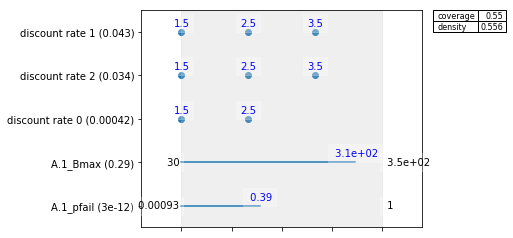

In [19]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

discount rate 0 [1.5, 2.5, 3.5, 4.5]
discount rate 1 [1.5, 2.5, 3.5, 4.5]
discount rate 2 [1.5, 2.5, 3.5, 4.5]


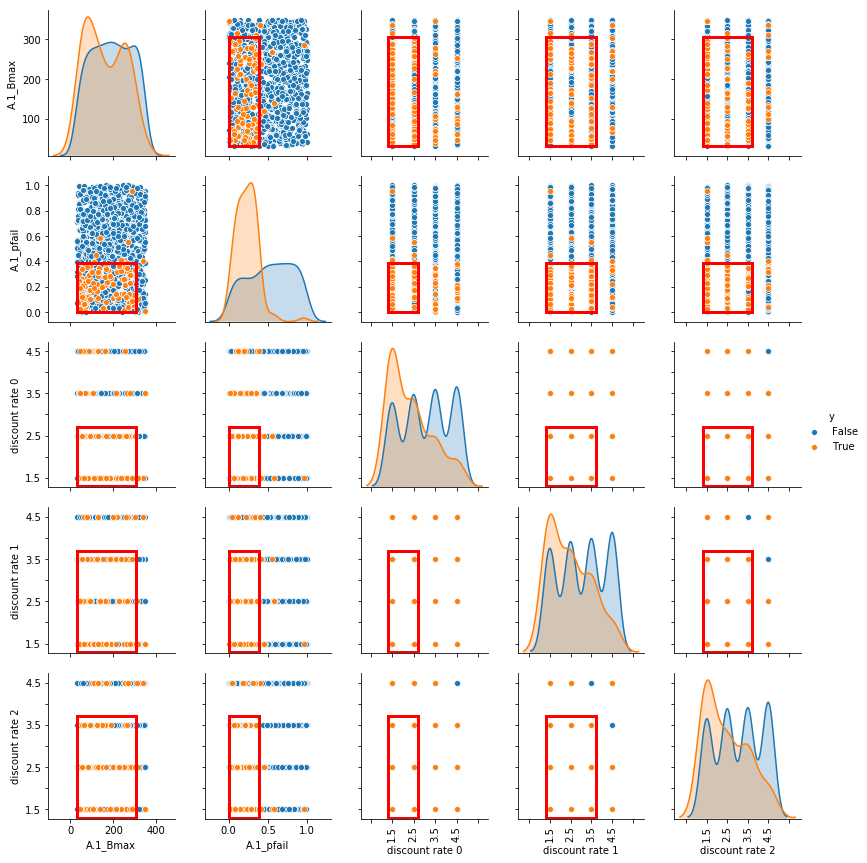

In [20]:
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

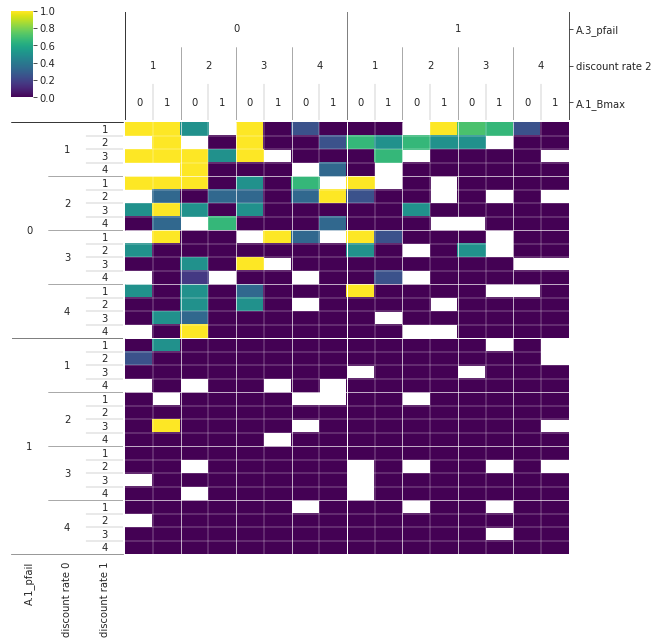

In [21]:
dimensional_stacking.create_pivot_plot(x, y_damages, 3, nbins = 2)
plt.show()

In [22]:
print(cart_alg.stats_to_dataframe())

       coverage   density   mass  res dim
box 1  0.173333  0.520000  0.050        2
box 2  0.406667  0.968254  0.063        2
box 3  0.373333  0.888889  0.063        2
box 4  0.046667  0.140000  0.050        1
box 5  0.000000  0.000000  0.774        1


In [23]:
cart_alg.boxes_to_dataframe

<bound method OutputFormatterMixin.boxes_to_dataframe of <ema_workbench.analysis.cart.CART object at 0x12c60db70>>

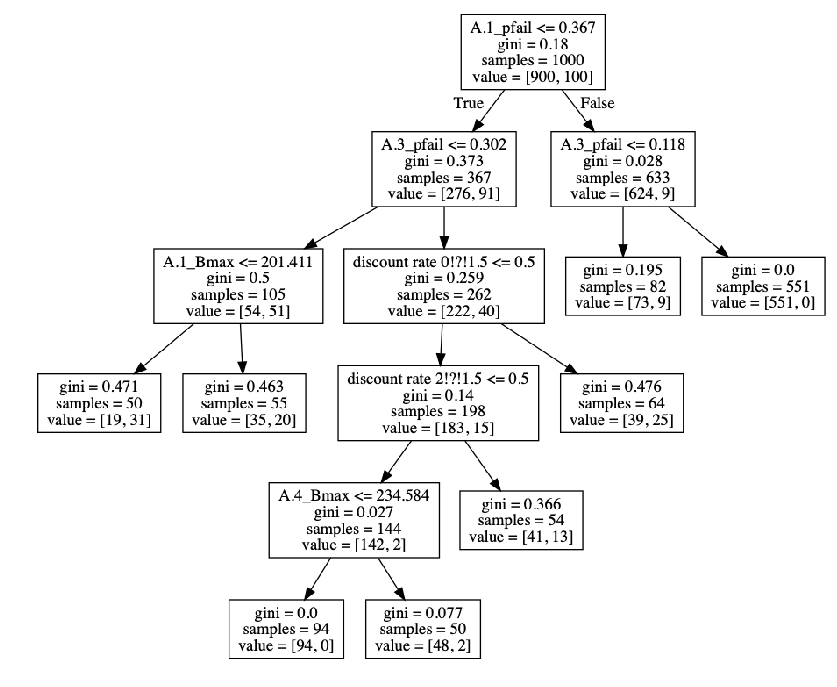

In [24]:
cart_alg = cart.CART(x, y_damages, 0.05)
cart_alg.build_tree()

# These don't work here for some reason
# print(cart_alg.stats_to_dataframe())
# print(cart_alg.boxes_to_dataframe())

fig = cart_alg.show_tree()
fig.set_size_inches(15, 12)
plt.show()